#At this point please ensure you have completed the two previous yfinance and web scraping labs. In this assignment you will upload screenshots of your code and results. You will also be reviewing the submission for one of your peers and grading their work.

As a data scientist working for an investment firm, you will extract the revenue data for Tesla and GameStop and build a dashboard to compare the price of the stock vs the revenue. 

Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

Question 7 - Sharing your Assignment Notebook - 2 Points

Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [1]:
#Run in case yfinance is not installed:
#pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Tesla in Yahoo = TSLA
#Extract data from API yfinance
yf_ts = yf.Ticker('TSLA')
#Get Market Data History
ts_hist = yf_ts.history(period="max")
ts_hist.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0


Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points


In [5]:
ts_url = "https://companiesmarketcap.com/tesla/revenue/"
ts_data = requests.get(ts_url).text
ts_soup = BeautifulSoup(ts_data, 'html.parser')
#Check quantity of tables in soup:
ts_tables = ts_soup.find_all('table')
print('Número de tablas en la url:',len(ts_tables))

Número de tablas en la url: 1


In [6]:
ts_revenue = pd.DataFrame(columns=["Year", "Revenue(Billions$)"],dtype=str)
for row in ts_soup.tbody.find_all('tr'):
    col = row.find_all('td')
    if (col != []):
        year = col[0].text.replace(" (TTM)","")
        revenue = col[1].text.replace("$","").replace(" B","")
        ts_revenue = ts_revenue.append({"Year":year, "Revenue(Billions$)":revenue}, ignore_index=True)
#clean and convert to numeric values
ts_revenue = ts_revenue.apply(pd.to_numeric, axis=0)
ts_revenue.sort_values(by=['Year'], ascending=True, inplace=True, ignore_index=True)
ts_revenue.head(2)

,Year,Revenue(Billions$)
0,2009,0.11
1,2010,0.11


Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [7]:
#GameStop in Yahoo = GME
yf_gme = yf.Ticker('GME')
gme_hist =yf_gme.history(period="max")
gme_hist.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
2002-02-14,6.850829,6.864295,6.682504,6.733002,2755400,0.0,0.0


Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [8]:
gme_url = "https://companiesmarketcap.com/gamestop/revenue/"
gme_data =requests.get(gme_url).text
gme_soup = BeautifulSoup(gme_data,'html.parser')
gme_tables= gme_soup.find_all('table')
print("Number of tables:",len(gme_tables))

Number of tables: 1


In [9]:
gme_revenue = pd.DataFrame(columns=["Year","Revenue(Billions$)"])
rows_list_gme = gme_soup.table.find_all('tr')
for row in rows_list_gme:
    column = row.find_all('td')
    if column !=[]:
        year = column[0].text.replace(" (TTM)","")
        revenue = column[1].text.replace("$","").replace(" B","")
        gme_revenue = gme_revenue.append({"Year":year,"Revenue(Billions$)":revenue,}, ignore_index=True)
gme_revenue.head(2)

,Year,Revenue(Billions$)
0,2022,6.01
1,2021,5.87


Question 5 - Tesla Stock and Revenue Dashboard - 2 Points       

In [10]:
#From question 1: ts_hist
ts_price = ts_hist[['Close']]
ts_price.reset_index(inplace=True)
ts_price = ts_price.rename(columns={'Close':'Price($)'})
serie_lastday_year_tsla = ts_price.groupby(ts_price.Date.dt.year)['Date'].max()
ts_filprice = ts_price[ts_price['Date'].isin(serie_lastday_year_tsla)].iloc[0:12]  
ts_fpr = ts_filprice.reset_index(drop=True)
ts_fpr.tail(2)

,Date,Price($)
10,2020-12-31,705.669983
11,2021-12-31,1056.780029


In [11]:
#From question 2: ts_revenue
ts_f_revenue = ts_revenue.loc[ts_revenue['Year'] > 2009]
df_fre_tsla = ts_f_revenue.reset_index(drop=True)

In [51]:
#concatenar: DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
ts_stackdata = pd.concat([ts_fpr, df_fre_tsla], axis=1)
ts_stackdata

,Date,Price($),Year,Revenue(Billions$)
0,2010-12-31,5.326000,2010,0.11
1,2011-12-30,5.712000,2011,0.20
2,2012-12-31,6.774000,2012,0.41
3,2013-12-31,30.086000,2013,2.01
4,2014-12-31,44.481998,2014,3.19
5,2015-12-31,48.001999,2015,4.04
6,2016-12-30,42.737999,2016,7.00
7,2017-12-29,62.270000,2017,11.75
8,2018-12-31,66.559998,2018,21.46
9,2019-12-31,83.666000,2019,24.57


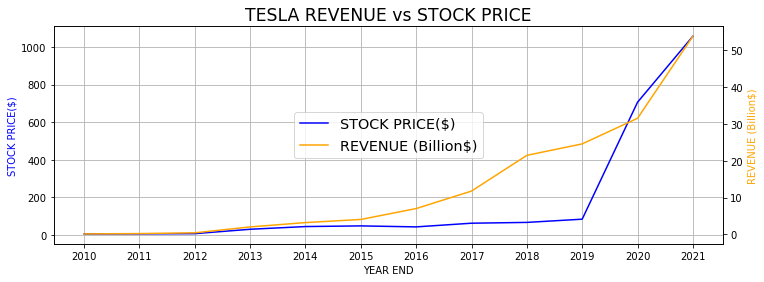

In [50]:
#Datas
year = ts_stackdata["Year"]
revenue = ts_stackdata["Revenue(Billions$)"]
price = ts_stackdata["Price($)"]

#Plot construction:
fig, ax = plt.subplots(figsize=(12, 4))

ln1 = ax.plot(year, price, label='STOCK PRICE($)', color='blue')
ax2 = ax.twinx()
ln2 =ax2.plot(year, revenue, label='REVENUE (Billion$)', color='orange')
ln = ln1 + ln2
labs = [l.get_label() for l in ln]
ax.legend(ln, labs, loc='center', fontsize='x-large')

ax.set_title("TESLA REVENUE vs STOCK PRICE", fontsize='xx-large')
ax.set_xlabel('YEAR END') 
ax.set_ylabel('STOCK PRICE($)', color='blue')
ax2.set_ylabel('REVENUE (Billion$)', color='orange')

ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.grid()

plt.show()

Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

In [21]:
#Output Question 3:gme_hist
#Output Question 4:gme_revenue

#Prepare price table:
gme_price = gme_hist[['Close']]
gme_price = gme_price.rename(columns={'Close':'Price($)'})
gme_price.reset_index(inplace=True)
serie_lastday_year_gme = gme_price.groupby(gme_price.Date.dt.year)['Date'].max()
gme_filt = gme_price[gme_price['Date'].isin(serie_lastday_year_gme)].iloc[0:20]
gme_fpr = gme_filt.reset_index(drop=True)

#Prepare revenue table:
gme_revenue.sort_values(by=['Year'], ascending=True, inplace=True, ignore_index=True)
gme_revenue = gme_revenue.apply(pd.to_numeric, axis=0)
gme_frev = gme_revenue.iloc[:20]

#Cot both tables:
gme_stackdata = pd.concat([gme_fpr,gme_frev], axis=1)
gme_stackdata

,Date,Price($),Year,Revenue(Billions$)
0,2002-12-31,3.299170,2002,1.34
1,2003-12-31,5.187778,2003,1.47
2,2004-12-31,7.527497,2004,1.75
3,2005-12-30,10.712206,2005,2.13
4,2006-12-29,18.552786,2006,4.68
5,2007-12-31,41.818668,2007,6.53
6,2008-12-31,14.583683,2008,8.17
7,2009-12-31,14.772204,2009,9.04
8,2010-12-31,15.405106,2010,9.30
9,2011-12-30,16.246725,2011,9.66


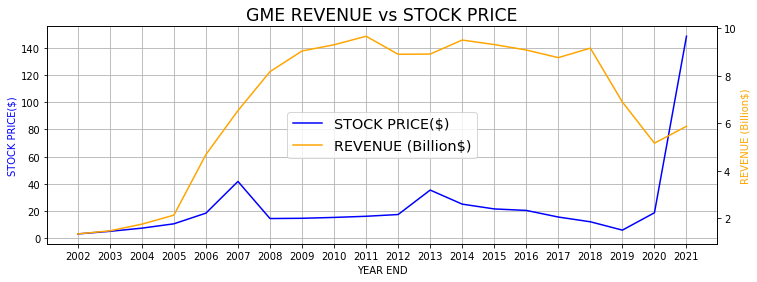

In [49]:
#Datas
year = gme_stackdata["Year"]
rev = gme_stackdata["Revenue(Billions$)"]
price = gme_stackdata["Price($)"]

#Plot construction:
fig, ax = plt.subplots(figsize=(12, 4))

ln1 = ax.plot(year, price, label='STOCK PRICE($)', color='blue')
ax2 = ax.twinx()
ln2 =ax2.plot(year, rev, label='REVENUE (Billion$)', color='orange')
ln = ln1 + ln2
labs = [l.get_label() for l in ln]
ax.legend(ln, labs, loc='center',fontsize='x-large')

ax.set_title("GME REVENUE vs STOCK PRICE", fontsize='xx-large')
ax.set_xlabel('YEAR END') 
ax.set_ylabel('STOCK PRICE($)', color='blue')
ax2.set_ylabel('REVENUE (Billion$)', color='orange')

ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.grid()

plt.show()